# Sound Data: The Pursuit of the Ideal Song

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")


Bad key text.latex.preview in file C:\Users\radov\anaconda3\envs\PythonData\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\radov\anaconda3\envs\PythonData\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\radov\anaconda3\envs\PythonData\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is s

In [2]:
# Locate the CSV file to be read.
spotify_data_path = "Resources/data.csv"

# Read the Spotify songs data.
spotify_data = pd.read_csv(spotify_data_path)

# Show the data
spotify_data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


## What makes a popular song a popular song?

In [3]:
# Establish bins for categorizing song popularity.
popularity_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ["Least Popular (1)", "2", "3", "4", "5", "6", "7", "8", "9", "Most Popular (10)"]

### Tempo?

In [4]:
# Create a DataFrame with only the "popularity" and "tempo" columns.
tempo_df = spotify_data[["popularity", "tempo"]]

In [5]:
# Categorize the popularity of each song based on the popularity bins.
tempo_df["Popularity Bin"] = pd.cut(tempo_df["popularity"], popularity_bins, labels=labels, include_lowest=True)

In [6]:
# Group by the popularity bins and find the mean tempo for each one.
tempo_means = pd.DataFrame(tempo_df.groupby(["Popularity Bin"]).mean()["tempo"])
tempo_means

,tempo
Popularity Bin,
Least Popular (1),109.809226
2,113.385109
3,118.369305
4,119.354498
5,120.338871
6,120.172103
7,121.074647
8,120.720360
9,121.948016


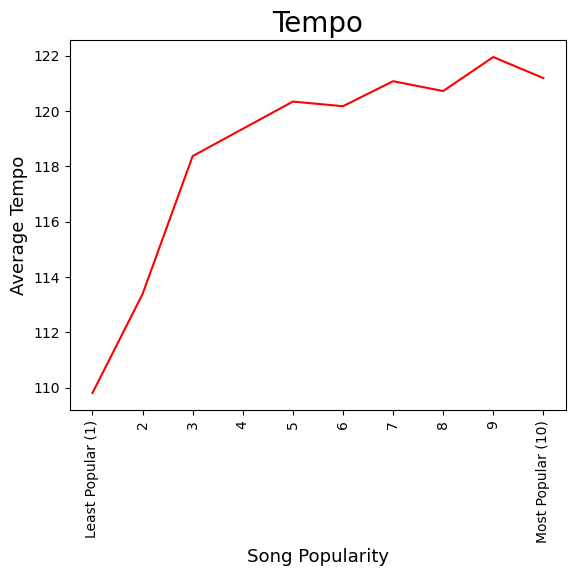

In [7]:
# Create a line graph of the DataFrame.
plt.plot(labels, tempo_means, color="red")
plt.xlabel("Song Popularity", fontdict={"fontsize": 13})
plt.xticks(rotation = "vertical")
plt.ylabel("Average Tempo", fontdict={"fontsize": 13})
plt.title("Tempo", fontdict={"fontsize": 20})
plt.show()

### Speechiness?

In [8]:
# Create a DataFrame with only the "popularity" and "speechiness" columns.
speechiness_df = spotify_data[["popularity", "speechiness"]]

In [9]:
# Categorize the popularity of each song based on the popularity bins.
speechiness_df["Popularity Bin"] = pd.cut(speechiness_df["popularity"], popularity_bins, labels=labels, include_lowest=True)

In [10]:
# Group by the popularity bins and find the mean speechiness for each one.
speechiness_means = pd.DataFrame(speechiness_df.groupby(["Popularity Bin"]).mean()["speechiness"])
speechiness_means

,speechiness
Popularity Bin,
Least Popular (1),0.167179
2,0.080372
3,0.063355
4,0.069378
5,0.077383
6,0.080210
7,0.093281
8,0.101280
9,0.102342


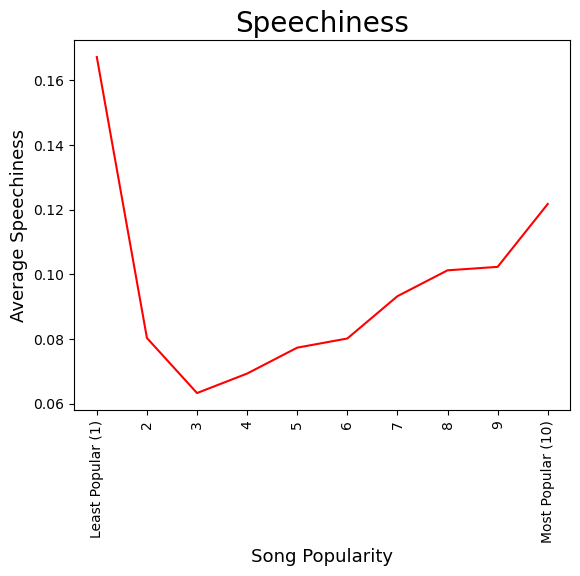

In [11]:
# Create a line graph of the DataFrame.
plt.plot(labels, speechiness_means, color="red")
plt.xlabel("Song Popularity", fontdict={"fontsize": 13})
plt.xticks(rotation = "vertical")
plt.ylabel("Average Speechiness", fontdict={"fontsize": 13})
plt.title("Speechiness", fontdict={"fontsize": 20})
plt.show()

### Loudness?

In [12]:
# Create a DataFrame with only the "popularity" and "loudness" columns.
loudness_df = spotify_data[["popularity", "loudness"]]

In [13]:
# Categorize the popularity of each song based on the popularity bins.
loudness_df["Popularity Bin"] = pd.cut(loudness_df["popularity"], popularity_bins, labels=labels, include_lowest=True)

In [14]:
# Group by the popularity bins and find the mean loudness for each one.
loudness_means = pd.DataFrame(loudness_df.groupby(["Popularity Bin"]).mean()["loudness"])
loudness_means

,loudness
Popularity Bin,
Least Popular (1),-15.017333
2,-13.693482
3,-12.162322
4,-11.060683
5,-9.439159
6,-8.482017
7,-7.871956
8,-6.844695
9,-6.593710


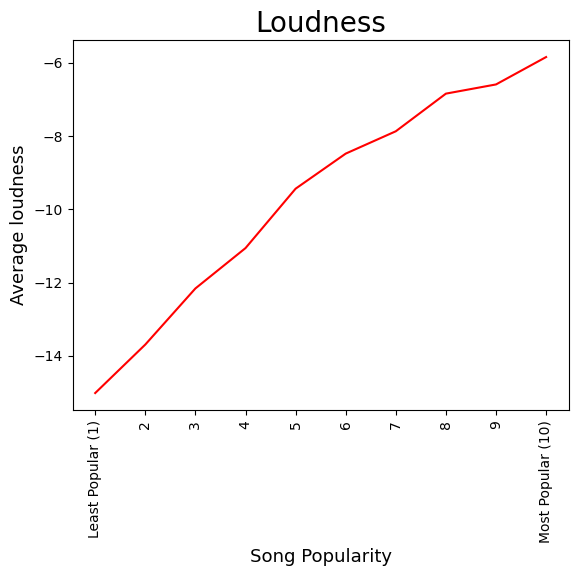

In [15]:
# Create a line graph of the DataFrame.
plt.plot(labels, loudness_means, color="red")
plt.xlabel("Song Popularity", fontdict={"fontsize": 13})
plt.xticks(rotation = "vertical")
plt.ylabel("Average loudness", fontdict={"fontsize": 13})
plt.title("Loudness", fontdict={"fontsize": 20})
plt.show()

### Instrumentalness?

In [16]:
# Create a DataFrame with only the "popularity" and "instrumentalness" columns.
instrumentalness_df = spotify_data[["popularity", "instrumentalness"]]

In [17]:
# Categorize the popularity of each song based on the popularity bins.
instrumentalness_df["Popularity Bin"] = pd.cut(instrumentalness_df["popularity"], popularity_bins, labels=labels, include_lowest=True)

In [18]:
# Group by the popularity bins and find the mean instrumentalness for each one.
instrumentalness_means = pd.DataFrame(instrumentalness_df.groupby(["Popularity Bin"]).mean()["instrumentalness"])
instrumentalness_means

,instrumentalness
Popularity Bin,
Least Popular (1),0.324920
2,0.199388
3,0.144451
4,0.126959
5,0.106812
6,0.081055
7,0.058884
8,0.023805
9,0.013756


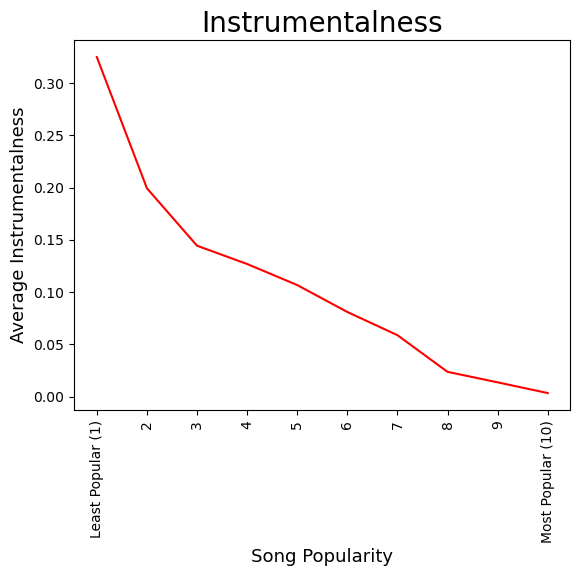

In [19]:
# Create a line graph of the DataFrame.
plt.plot(labels, instrumentalness_means, color="red")
plt.xlabel("Song Popularity", fontdict={"fontsize": 13})
plt.xticks(rotation = "vertical")
plt.ylabel("Average Instrumentalness", fontdict={"fontsize": 13})
plt.title("Instrumentalness", fontdict={"fontsize": 20})
plt.show()

### Acousticness?

In [20]:
# Create a DataFrame with only the "popularity" and "acousticness" columns.
acousticness_df = spotify_data[["popularity", "acousticness"]]

In [21]:
# Categorize the popularity of each song based on the popularity bins.
acousticness_df["Popularity Bin"] = pd.cut(acousticness_df["popularity"], popularity_bins, labels=labels, include_lowest=True)

In [22]:
# Group by the popularity bins and find the mean acousticness for each one.
acousticness_means = pd.DataFrame(acousticness_df.groupby(["Popularity Bin"]).mean()["acousticness"])
acousticness_means

,acousticness
Popularity Bin,
Least Popular (1),0.845349
2,0.724277
3,0.478301
4,0.379986
5,0.325177
6,0.291735
7,0.272957
8,0.237937
9,0.251331


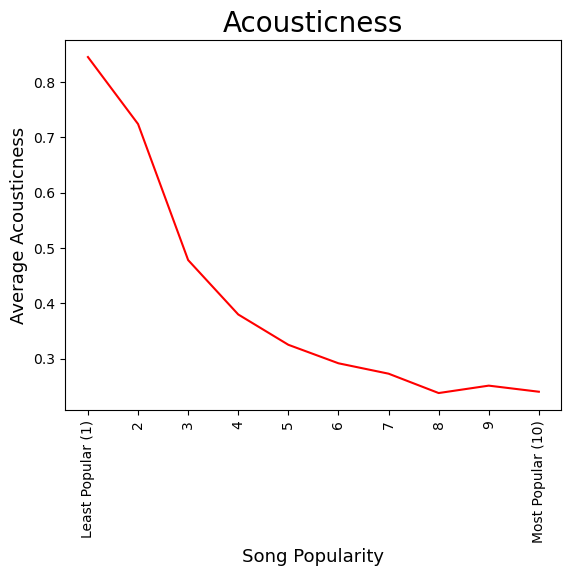

In [23]:
# Create a line graph of the DataFrame.
plt.plot(labels, acousticness_means, color="red")
plt.xlabel("Song Popularity", fontdict={"fontsize": 13})
plt.xticks(rotation = "vertical")
plt.ylabel("Average Acousticness", fontdict={"fontsize": 13})
plt.title("Acousticness", fontdict={"fontsize": 20})
plt.show()

### Valence?

In [24]:
# Create a DataFrame with only the "popularity" and "valence" columns.
valence_df = spotify_data[["popularity", "valence"]]

In [25]:
# Categorize the popularity of each song based on the popularity bins.
valence_df["Popularity Bin"] = pd.cut(valence_df["popularity"], popularity_bins, labels=labels, include_lowest=True)

In [26]:
# Group by the popularity bins and find the mean valence for each one.
valence_means = pd.DataFrame(valence_df.groupby(["Popularity Bin"]).mean()["valence"])
valence_means

,valence
Popularity Bin,
Least Popular (1),0.504878
2,0.521872
3,0.558622
4,0.553431
5,0.538381
6,0.517501
7,0.505782
8,0.504800
9,0.490849


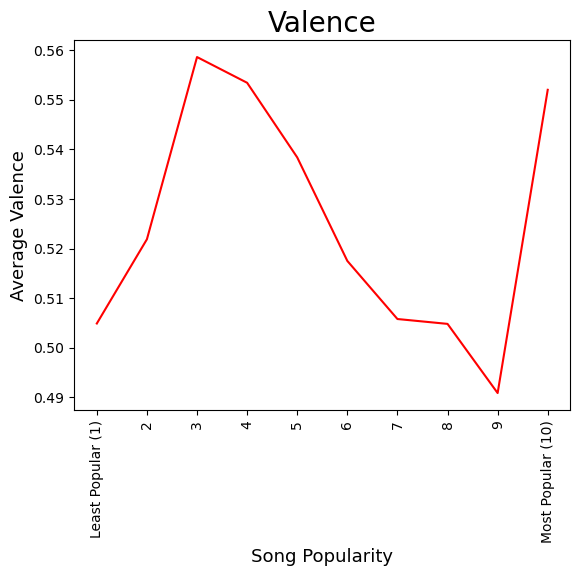

In [27]:
# Create a line graph of the DataFrame.
plt.plot(labels,valence_means, color="red")
tick_locations = [value for value in labels]
plt.xticks(tick_locations, labels, rotation=90)
plt.xlabel("Song Popularity", fontdict={"fontsize": 13})
plt.ylabel("Average Valence", fontdict={"fontsize": 13})
plt.title("Valence", fontdict={"fontsize": 20})
plt.show()

### Danceability?

In [28]:
# Create a DataFrame with only the "popularity" and "danceability" columns.
danceability_df = spotify_data[["popularity", "danceability"]]

In [29]:
# Categorize the popularity of each song based on the popularity bins.
danceability_df["Popularity Bin"] = pd.cut(danceability_df["popularity"], popularity_bins, labels=labels, include_lowest=True)

In [30]:
# Group by the popularity bins and find the mean danceability for each one.
danceability_means = pd.DataFrame(danceability_df.groupby(["Popularity Bin"]).mean()["danceability"])
danceability_means

,danceability
Popularity Bin,
Least Popular (1),0.501948
2,0.495730
3,0.514158
4,0.535963
5,0.555624
6,0.575951
7,0.605805
8,0.645241
9,0.675633


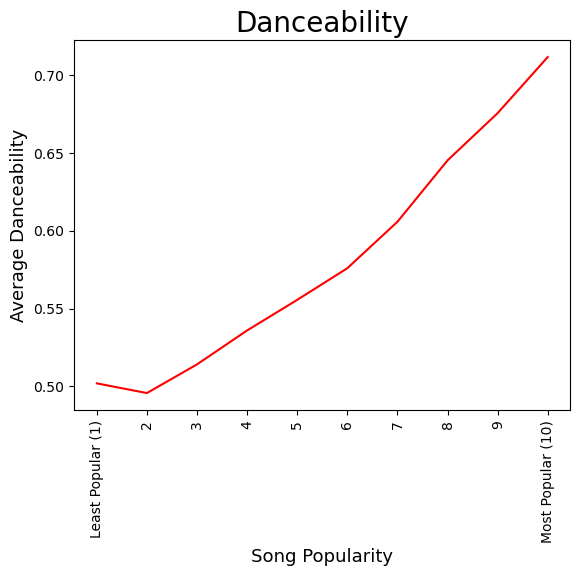

In [31]:
# Create a line graph of the DataFrame.
plt.plot(labels,danceability_means, color="red")
tick_locations = [value for value in labels]
plt.xticks(tick_locations, labels, rotation="vertical")
plt.xlabel("Song Popularity", fontdict={"fontsize": 13})
plt.ylabel("Average Danceability", fontdict={"fontsize": 13})
plt.title("Danceability", fontdict={"fontsize": 20})
plt.show()

### Duration?

In [32]:
# Create a DataFrame with only the "popularity" and "duration_ms" columns.
duration_ms_df = spotify_data[["popularity", "duration_ms"]]

In [33]:
# Categorize the popularity of each song based on the popularity bins.
duration_ms_df["Popularity Bin"] = pd.cut(duration_ms_df["popularity"], popularity_bins, labels=labels, include_lowest=True)

In [34]:
# Convert ms (milliseconds) to s (seconds)
duration_ms_df["duration_sec"] = duration_ms_df["duration_ms"]
duration_ms_df.duration_sec /=1000

In [35]:
# Group by the popularity bins and find the mean duration in s (seconds) for each one.
duration_sec_means = pd.DataFrame(duration_ms_df.groupby(["Popularity Bin"]).mean()["duration_sec"])
duration_sec_means.renamed = duration_sec_means.rename(columns={"duration_sec":"duration in seconds (s)"})
duration_sec_means.renamed  

,duration in seconds (s)
Popularity Bin,
Least Popular (1),213.735293
2,218.835367
3,236.296579
4,244.078800
5,243.520614
6,238.768466
7,224.962221
8,215.719373
9,204.634788


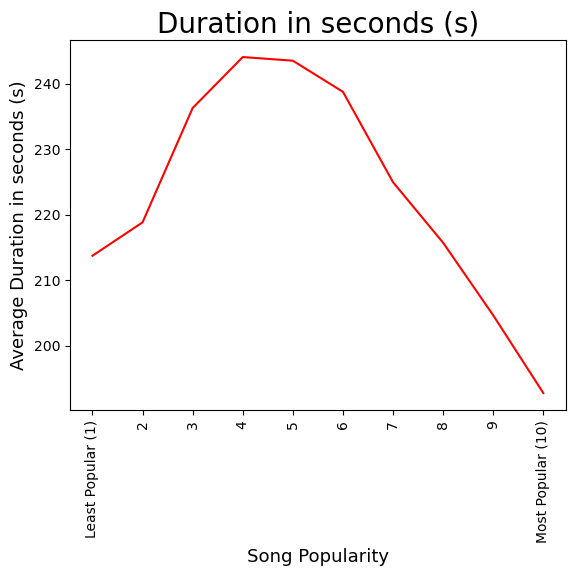

In [36]:
# Create a line graph of the DataFrame.
plt.plot(labels,duration_sec_means.renamed, color="red")
tick_locations = [value for value in labels]
plt.xticks(tick_locations, labels, rotation="vertical")
plt.xlabel("Song Popularity", fontdict={"fontsize": 13})
plt.ylabel("Average Duration in seconds (s)", fontdict={"fontsize": 13})
plt.title("Duration in seconds (s)", fontdict={"fontsize": 20})
plt.show()

### Energy?

In [37]:
# Create a DataFrame with only the "popularity" and "energy" columns.
energy_df = spotify_data[["popularity", "energy"]]

In [38]:
# Categorize the popularity of each song based on the popularity bins.
energy_df["Popularity Bin"] = pd.cut(energy_df["popularity"], popularity_bins, labels=labels, include_lowest=True)

In [39]:
# Group by the popularity bins and find the mean energy for each one.
energy_means = pd.DataFrame(energy_df.groupby(["Popularity Bin"]).mean()["energy"])
energy_means

,energy
Popularity Bin,
Least Popular (1),0.277592
2,0.352427
3,0.492705
4,0.546723
5,0.594089
6,0.615521
7,0.618416
8,0.635785
9,0.611099


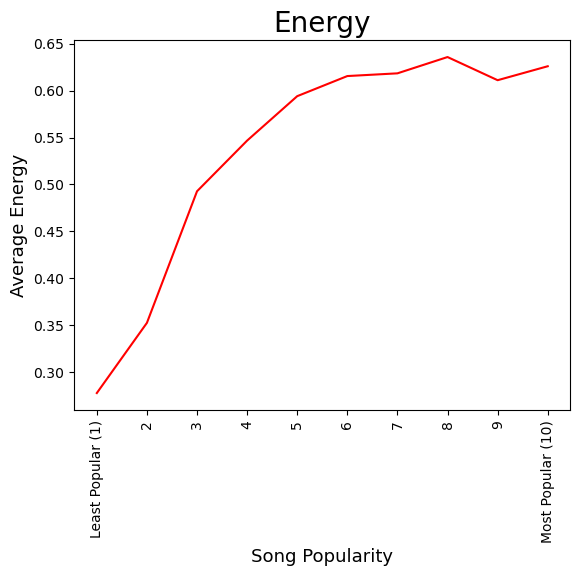

In [40]:
# Create a line graph of the DataFrame.
plt.plot(labels,energy_means, color="red")
tick_locations = [value for value in labels]
plt.xticks(tick_locations, labels, rotation="vertical")
plt.xlabel("Song Popularity", fontdict={"fontsize": 13})
plt.ylabel("Average Energy", fontdict={"fontsize": 13})
plt.title("Energy", fontdict={"fontsize": 20})
plt.show()

### Liveness

In [41]:
# Create a DataFrame with only the "popularity" and "liveness" columns.
liveness_df = spotify_data[["popularity", "liveness"]]

In [42]:
# Categorize the popularity of each song based on the popularity bins.
liveness_df["Popularity Bin"] = pd.cut(liveness_df["popularity"], popularity_bins, labels=labels, include_lowest=True)

In [43]:
# Group by the popularity bins and find the mean liveness for each one.
liveness_means = pd.DataFrame(liveness_df.groupby(["Popularity Bin"]).mean()["liveness"])
liveness_means

,liveness
Popularity Bin,
Least Popular (1),0.220638
2,0.212787
3,0.220964
4,0.203508
5,0.197185
6,0.188902
7,0.183633
8,0.175023
9,0.164406


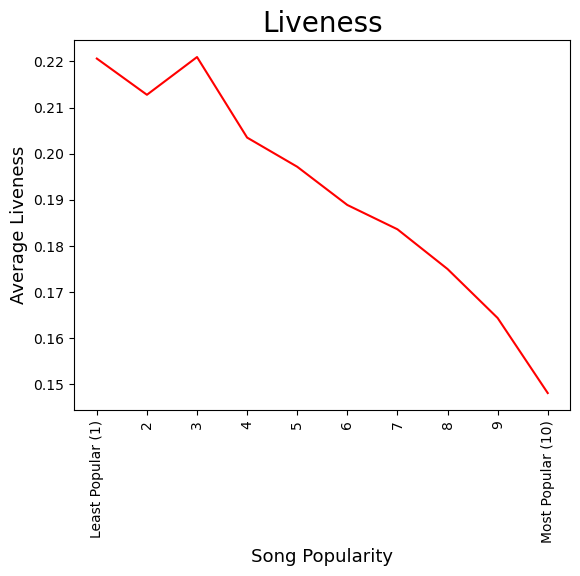

In [44]:
# Create a line graph of the DataFrame.
plt.plot(labels,liveness_means, color="red")
tick_locations = [value for value in labels]
plt.xticks(tick_locations, labels, rotation="vertical")
plt.xlabel("Song Popularity", fontdict={"fontsize": 13})
plt.ylabel("Average Liveness", fontdict={"fontsize": 13})
plt.title("Liveness", fontdict={"fontsize": 20})
plt.show()

### Explicitness 

In [45]:
# Create a DataFrame with only the "popularity" and "explicit" columns.
explicit_df = spotify_data[["popularity", "explicit"]]

In [46]:
# Categorize the popularity of each song based on the popularity bins.
explicit_df["Popularity Bin"] = pd.cut(explicit_df["popularity"], popularity_bins, labels=labels, include_lowest=True)

In [47]:
# Figure out the total number of songs for each popularity bin.
total_songs_per_pop_bin = pd.DataFrame(explicit_df.groupby(["Popularity Bin"]).count()["explicit"])

# Create a DataFrame with only explicit songs and figure out the total number of explicit songs for each popularity bin.
explicit_songs = pd.DataFrame(explicit_df[explicit_df["explicit"] == 1])
explicit_songs_per_pop_bin = pd.DataFrame(explicit_songs.groupby(["Popularity Bin"]).count()["explicit"])

# Divide explicit song counts by total song counts to figure out the percentage of explicit songs per popularity bin.
explicit_percent = (explicit_songs_per_pop_bin / total_songs_per_pop_bin) * 100
explicit_percent

,explicit
Popularity Bin,
Least Popular (1),6.107254
2,0.189964
3,0.928886
4,5.211680
5,9.981599
6,15.221230
7,24.151268
8,32.265877
9,35.686275


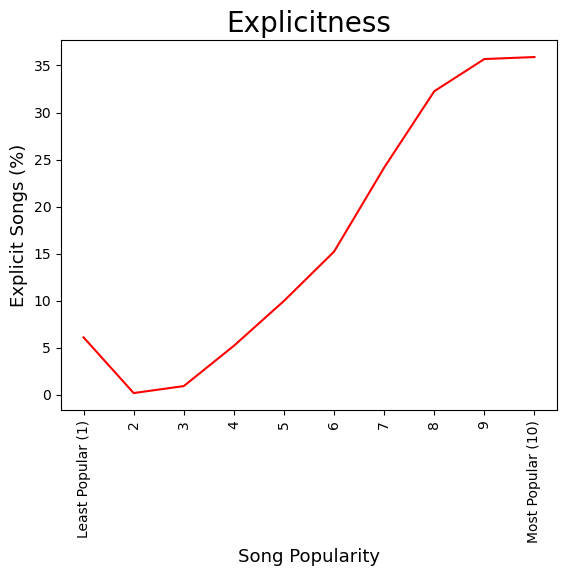

In [48]:
# Create a line graph of the DataFrame.
plt.plot(labels,explicit_percent, color="red")
tick_locations = [value for value in labels]
plt.xticks(tick_locations, labels, rotation="vertical")
plt.xlabel("Song Popularity", fontdict={"fontsize": 13})
plt.ylabel("Explicit Songs (%)", fontdict={"fontsize": 13})
plt.title("Explicitness", fontdict={"fontsize": 20})
plt.show()